In [2]:
# 导入Overlay
from pynq import Overlay
ol = Overlay('/home/xilinx/pynq/overlays/lenet/py_hw/lenet.bit')
ol.is_loaded()
lenet=ol.LeNet_PYNQ_0
#help(enet. write)

In [3]:
import numpy as np
from pynq import Xlnk
from pynq import MMIO
import cv2
from matplotlib import pyplot as plt

In [4]:

# 定义一个函数，用于运行LeNet模型
def Runlenet(lenet,img_in, out):
    # 这里寄存器地址改为自己的寄存器的地址

    
    lenet.write(0x10,img_in.physical_address)
    
    lenet.write(0x18, out.physical_address)

    lenet.write(0,(lenet.read(0)&0x80)|0x01);
    tp=lenet.read(0)
    # 当tp的低位与1进行按位与运算的结果为0时，循环执行
    while not((tp>>1)&0x1):
        # 读取lenet的0寄存器的值
        tp=lenet.read(0);

In [5]:
# 定义一个函数test_conv2d_nhwc_nchw，用于测试卷积函数
xlnk=Xlnk()
# 创建一个Xlnk对象
img=xlnk.cma_array(shape=(28,28),cacheable=0, dtype=np. float32)
# 创建一个大小为(28,28)的float32类型的cma_array
out=xlnk.cma_array(shape=(10),cacheable=0, dtype=np.float32)

In [11]:
# 读入图像
image = cv2.imread("2.png",0).astype(np.float32)


Hardware run finish
The number you write is 2


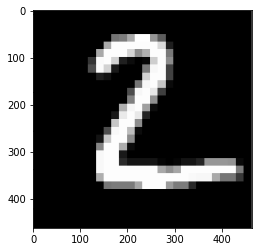

In [15]:
# 读入像素值
for i in range(28):
    for j in range(28):
        img[i][j]=image[i][j]

Runlenet(lenet,img,out)
print("Hardware run finish")
MAX=0
result=0
for i in range(10):
    if(out[i]>MAX):
        MAX=out[i]
        result=i
# 显示图像与检测结果
print("The number you write is "+str(result))
plt.imshow(image,"gray")
plt.show()
